In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
datapath = '/Users/carmenamme/Library/CloudStorage/OneDrive-Personal/Documents – Carmens MacBook Pro/cognitive_science/sem2/EEGinVR';

#read in data from individual subjects
sub1 = pd.read_csv(datapath + '/sub1.csv', sep = ',')
sub2 = pd.read_csv(datapath + '/sub2.csv', sep = ',')
sub3 = pd.read_csv(datapath + '/sub3.csv', sep = ',')
sub4 = pd.read_csv(datapath + '/sub4.csv', sep = ',')

#add information about subject number
sub1['SubNr'] = '1'
sub2['SubNr'] = '2'
sub3['SubNr'] = '3'
sub4['SubNr'] = '4'

#merge individual dfs into one large df
data = pd.concat([sub1, sub2, sub3, sub4], ignore_index=True)
print(len(data))

#delete rows where response time=0 and when there was no response
data = data.drop(data[data[' ResponsePosition'] == 'noResponse'].index)
data = data.drop(data[data[' ReactionTime'] == 0.000000].index)

print(len(data))
print(data)

96
88
    BlockNumber   TaskNumber  EmotionalExpression  PositionExpression  \
3             5            0                  sad               right   
4             4            4               afraid                left   
5             4            3               afraid                left   
6             4            2                  sad               right   
7             4            1                angry                left   
..          ...          ...                  ...                 ...   
91            1            4               afraid                left   
92            1            3                happy               right   
93            1            2               afraid                left   
94            1            1               afraid                left   
95            1            0               afraid                left   

    NeutralAvatar   ReactionTime  ResponsePosition SubNr  
3           young       1.273148              left     1  

In [4]:
#add a column with information about response
data['Response'] = np.where(data[' ResponsePosition'] == data[' PositionExpression'], 'Approach', 'Avoidance')

print(data)

    BlockNumber   TaskNumber  EmotionalExpression  PositionExpression  \
3             5            0                  sad               right   
4             4            4               afraid                left   
5             4            3               afraid                left   
6             4            2                  sad               right   
7             4            1                angry                left   
..          ...          ...                  ...                 ...   
91            1            4               afraid                left   
92            1            3                happy               right   
93            1            2               afraid                left   
94            1            1               afraid                left   
95            1            0               afraid                left   

    NeutralAvatar   ReactionTime  ResponsePosition SubNr   Response  
3           young       1.273148              left   

In [5]:
#get response count for the individual emotions

happy_df = data.loc[data[' EmotionalExpression'] == 'happy']
happy_rt = happy_df[' ReactionTime'].squeeze()
print(happy_df.Response.value_counts())

angry_df = data.loc[data[' EmotionalExpression'] == 'angry']
angry_rt = angry_df[' ReactionTime'].squeeze()
print(angry_df.Response.value_counts())

sad_df = data.loc[data[' EmotionalExpression'] == 'sad']
sad_rt = sad_df[' ReactionTime'].squeeze()
print(sad_df.Response.value_counts())

afraid_df = data.loc[data[' EmotionalExpression'] == 'afraid']
afraid_rt = afraid_df[' ReactionTime'].squeeze()
print(afraid_df.Response.value_counts())

Approach     16
Avoidance     3
Name: Response, dtype: int64
Avoidance    21
Approach      2
Name: Response, dtype: int64
Avoidance    24
Name: Response, dtype: int64
Avoidance    22
Name: Response, dtype: int64


In [6]:
#get mean rt  and sd for each emotional expression, regardless of response

happy_mean = happy_df[' ReactionTime'].mean()
sad_mean = sad_df[' ReactionTime'].mean()
angry_mean = angry_df[' ReactionTime'].mean()
afraid_mean = afraid_df[' ReactionTime'].mean()

print(happy_mean)
print(sad_mean)
print(angry_mean)

happy_sd = happy_df[' ReactionTime'].sem()
sad_sd = sad_df[' ReactionTime'].sem()
angry_sd = angry_df[' ReactionTime'].sem()
afraid_sd = afraid_df[' ReactionTime'].sem()

print(happy_sd)
print(angry_sd)

1.5055655421052632
1.4001262208333334
1.3491279652173913
0.19835990278431964
0.14422050390376623


In [7]:
#put approach and avoidance count into appropriate array; then conduct chi2 test
app_avoi_arr = np.array([[16, 2, 0, 0], [3, 21, 24, 22]])

stat, p, dof, expected = chi2_contingency(app_avoi_arr)
print('dof=%d' % dof)
print(expected)
print(stat)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
[[ 3.88636364  4.70454545  4.90909091  4.5       ]
 [15.11363636 18.29545455 19.09090909 17.5       ]]
61.24999455159638
probability=0.950, critical=7.815, stat=61.250
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [8]:
#conduct anova to find if there is a difference in RT between different emotions, regardless of response
#MISSING: ADD TABLE

anova = f_oneway(data[' ReactionTime'][data[' EmotionalExpression'] == 'happy'],
 data[' ReactionTime'][data[' EmotionalExpression'] == 'sad'],
 data[' ReactionTime'][data[' EmotionalExpression'] == 'angry'],
 data[' ReactionTime'][data[' EmotionalExpression'] == 'afraid'])
print(anova)

F_onewayResult(statistic=0.16101436973947056, pvalue=0.9222808485247679)


In [48]:
#conduct dependent t-test to find out if there is a significant difference in RT for approach vs avoidance response 
#TRROWS ERROR

approach = data.loc[data['Response'] == 'Approach']
avoidance = data.loc[data['Response'] == 'Avoidance']
app_rt = np.array(approach.iloc[:,5])
avo_rt = np.array(avoidance.iloc[:,5])

if len(app_rt) < len(avo_rt):
    long_arr = len(avo_rt)
if len(app_rt) > len(avo_rt):
    long_arr = len(app_rt)

for i in range(long_arr):
    if len(app_rt) < len(avo_rt):
        app_rt = np.append(app_rt, nan)
    if len(app_rt) > len(avo_rt):
        avo_rt = np.append(avo_rt, nan)
print(len(app_rt))
print(len(avo_rt))

stats.ttest_rel(avo_rt, app_rt, nan_policy='omit', alternative='two-sided')

70
70


TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [10]:
#data.groupby(['Response']).mean()
data.groupby(['Response']).sem()



,BlockNumber,TaskNumber,ReactionTime
Response,,,
Approach,0.297655,0.304886,0.158867
Avoidance,0.155364,0.168996,0.091123


In [ ]:
#delete columns that are disturbing and not necessary when grouping the data
data = data.drop(['BlockNumber', ' TaskNumber'], axis=1)

#show reaction time mean for each response
data.groupby('Response').mean()

In [ ]:
#show reaction time standard error for each response
data.groupby('Response').sem()

In [ ]:
#show trial count for each response and emomtional expression
data.groupby([' EmotionalExpression', 'Response']).count()

In [ ]:
#show trial count for each emomtional expression
data.groupby([' EmotionalExpression']).count()

In [ ]:
#show reaction time mean for each response and emomtional expression
data.groupby([' EmotionalExpression', 'Response']).mean()

In [ ]:
#show reaction time standard error for each response and emomtional expression

data.groupby([' EmotionalExpression', 'Response']).sem()

In [ ]:
#show reaction time mean for responses with left vs right hand
data.groupby([' ResponsePosition']).mean()

In [ ]:
#show reaction time standard error for responses with left vs right hand
data.groupby([' ResponsePosition']).sem()

In [ ]:
#show reaction time mean for young vs old avatar
data.groupby([' NeutralAvatar']).mean()

In [ ]:
#show reaction time standard error for young vs old avatar
data.groupby([' NeutralAvatar']).sem()

In [ ]:
sns.set(style="whitegrid")

palette ={"Avoidance": "salmon", "Approach": "powderblue"}

ax = sns.countplot(data=data, x=" EmotionalExpression", 
                   hue="Response", palette=palette, alpha=0.5)

for container in ax.containers:
    ax.bar_label(container)

ax.set(ylim=(0,30))
    
#plt.title('Response Count for each Emotional Expression', y=1.05, fontsize = 13)
plt.xlabel('Emotional Expression')
plt.ylabel('Response Count')

In [ ]:
ax = sns.countplot(data=data, x=" NeutralAvatar", 
                   hue="Response", palette=palette, alpha=0.5)

for container in ax.containers:
    ax.bar_label(container)

ax.set(ylim=(0,75))
    
#plt.title('Response Count for Young and Old Neutral Avatars', y=1.05, fontsize = 13)
plt.xlabel('Neutral Avatar')
plt.ylabel('Response Count')

In [ ]:
df1 = data.groupby(" NeutralAvatar")['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
print(df1)

g = sns.catplot(x=" NeutralAvatar",y='percent',hue='Response',kind='bar',data=df1,
               palette=palette, alpha=0.5, legend=False, order=['young', 'old'])
g.ax.set_ylim(0,105)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Neutral Avatar')
plt.ylabel('Percent Response')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    

In [ ]:
sns.set(style="whitegrid")

sns.barplot(data=data, x=' EmotionalExpression', y=' ReactionTime', hue='Response', ci = "sd", capsize = 0.1,
            errwidth=1,
            palette=palette, alpha=0.5)

sns.swarmplot(data=data, x=' EmotionalExpression', y=' ReactionTime', hue='Response', dodge=True,
             palette=palette, alpha=0.8)

#plt.title('Reaction Times for each Emotional Expression', y=1.05, fontsize = 13)
plt.xlabel('Emotional Expression')
plt.ylabel('Reaction Times in sec')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
sns.set(style="whitegrid")

sns.barplot(data=data, x=' ResponsePosition', y=' ReactionTime',
            ci = "sd", capsize = 0.1,
            errwidth=1,
            color='indianred', alpha=0.5)
sns.swarmplot(data=data, x=' ResponsePosition', y=' ReactionTime',
            color='indianred', alpha=0.8)

#plt.title('Reaction Times for Left and Right Responses', y=1.05, fontsize = 13)
plt.xlabel('Direction of Chosen Response')
plt.ylabel('Reaction Times in sec')

Text(0, 0.5, 'Power Spectral Density ($V^2/Hz$)')

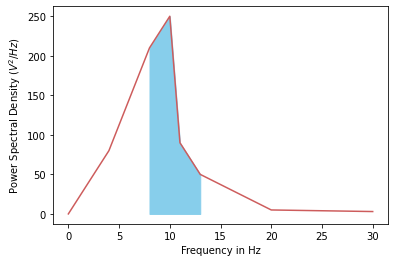

In [38]:
#create and plot expected EEG data
freq = np.array([0, 1, 4,  8, 10, 11, 13, 20, 25, 30])
psd = np.array([0, 20, 80, 210, 250, 90, 50, 5, 4, 3])
sns.lineplot(x=freq, y=psd, color='indianred')

low, high = 8, 13
alpha = np.logical_and(freq >= low, freq <= high)
plt.fill_between(freq, psd, where=alpha, color='skyblue')

plt.xlabel('Frequency in Hz')
plt.ylabel('Power Spectral Density ($V^2/Hz$)')